<a href="https://colab.research.google.com/github/Jayashreehv/ComputerVisionProjects/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:19<00:00, 48.3MB/s]
100% 1.06G/1.06G [00:19<00:00, 58.8MB/s]


In [6]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [8]:
train_data = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(256,256)
)
val_data = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
def process(image,label):
  image = tf.cast(image/255 , tf.float32)
  return image,label

In [10]:
train_data = train_data.map(process)
val_data = val_data.map(process)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
625/625 [==============================] - 68s 92ms/step - loss: 0.6064 - accuracy: 0.6702 - val_loss: 0.5372 - val_accuracy: 0.7354
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4691 - accuracy: 0.7744 - val_loss: 0.4593 - val_accuracy: 0.7896
Epoch 3/10
625/625 [==============================] - 58s 92ms/step - loss: 0.3607 - accuracy: 0.8380 - val_loss: 0.4737 - val_accuracy: 0.8010
Epoch 4/10
625/625 [==============================] - 58s 92ms/step - loss: 0.2281 - accuracy: 0.9046 - val_loss: 0.5839 - val_accuracy: 0.7784
Epoch 5/10
625/625 [==============================] - 58s 93ms/step - loss: 0.1341 - accuracy: 0.9499 - val_loss: 0.7483 - val_accuracy: 0.7956
Epoch 6/10
625/625 [==============================] - 59s 93ms/step - loss: 0.0838 - accuracy: 0.9700 - val_loss: 0.8648 - val_accuracy: 0.7922
Epoch 7/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0611 - accuracy: 0.9798 - val_loss: 1.0345 - val_accuracy:

Validation accuray is less than Training accuracy in other way, Validation loss is more than training loss------------overfitting

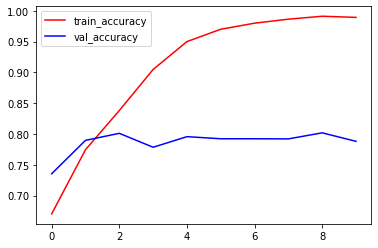

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train_accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='val_accuracy')
plt.legend()
plt.show()



Training accuracy increases and validation accuracy has decreases or constant after few iterations

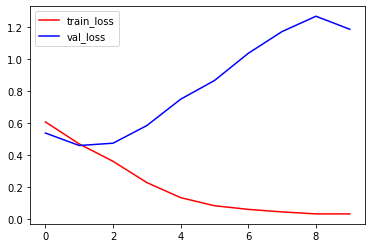

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train_loss')
plt.plot(history.history['val_loss'],color='blue',label='val_loss')
plt.legend()
plt.show()

As training loss is decreasing with iterations, validation loss is increasing

It is a clear indication of overfitting

# To reduce overfitting
1. Increase data
2. Use data augementation
3. L1/L2 Regulerator
4. Dropout
5. Batch normalization
6. Reduce complexity

In [19]:
# use batchnormalization and drop out method here
from keras.layers import BatchNormalization,Dropout

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
625/625 [==============================] - 74s 117ms/step - loss: 1.5604 - accuracy: 0.5538 - val_loss: 0.6842 - val_accuracy: 0.5724
Epoch 2/10
625/625 [==============================] - 73s 116ms/step - loss: 0.6590 - accuracy: 0.6069 - val_loss: 0.7747 - val_accuracy: 0.5960
Epoch 3/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5849 - accuracy: 0.6768 - val_loss: 0.5929 - val_accuracy: 0.6976
Epoch 4/10
625/625 [==============================] - 73s 116ms/step - loss: 0.4913 - accuracy: 0.7532 - val_loss: 0.6919 - val_accuracy: 0.6810
Epoch 5/10
625/625 [==============================] - 74s 119ms/step - loss: 0.4401 - accuracy: 0.7875 - val_loss: 0.5306 - val_accuracy: 0.7556
Epoch 6/10
625/625 [==============================] - 75s 119ms/step - loss: 0.3910 - accuracy: 0.8138 - val_loss: 0.4654 - val_accuracy: 0.7692
Epoch 7/10
625/625 [==============================] - 75s 119ms/step - loss: 0.3380 - accuracy: 0.8439 - val_loss: 0.4288 - val_ac

Validation accuracy is increased compared to previous model

# Testing with new image

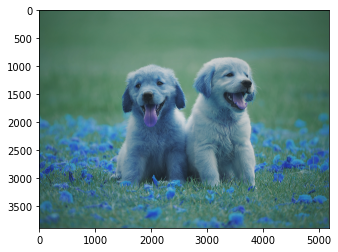

In [41]:
import cv2
test_image_dog = cv2.imread('/content/dog.jpg')
test_image_cat = cv2.imread('/content/cat2.jpg')

plt.imshow(test_image_dog)



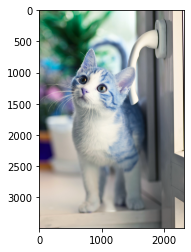

In [42]:
plt.imshow(test_image_cat)

In [43]:
test_image_dog.shape

(3888, 5184, 3)

In [44]:
test_image_cat.shape

(3495, 2326, 3)

In [45]:
test_image_dog=cv2.resize(test_image_dog,(256,256))
test_input_dog = test_image_dog.reshape(1,256,256,3)
test_image_cat=cv2.resize(test_image_cat,(256,256))
test_input_cat = test_image_cat.reshape(1,256,256,3)

In [46]:
model.predict(test_input_dog)

1/1 [==============================] - 0s 16ms/step


array([[1.]], dtype=float32)

In [47]:
model.predict(test_input_cat)

1/1 [==============================] - 0s 15ms/step


array([[0.]], dtype=float32)

Dog is predicted as class 1 and cat is predicted as class 0